In [47]:
# load libraries
import pandas as pd
import os
import sys
# confiure display options
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_rows', None)
# set right path for module
module_path = os.path.abspath(os.path.join('..'))
module_path = module_path + "/python"
if module_path not in sys.path:
    sys.path.append(module_path)


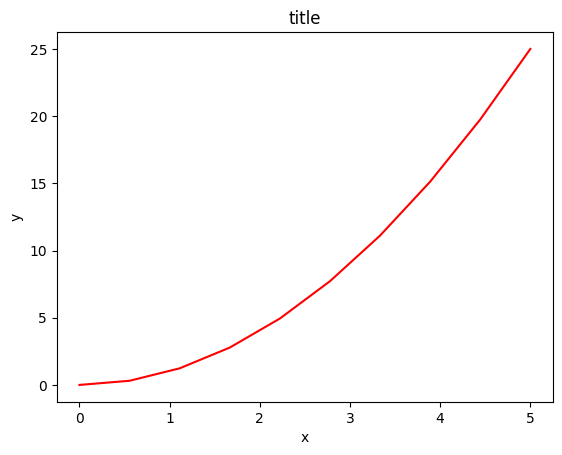

In [48]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 5, 10)
y = x ** 2

plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

In [49]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [ ]:
from posted.tedf import TEDF
from posted.noslag import DataSet

In [ ]:
tedf = TEDF('Tech|Electrolysis')
tedf.load()
tedf.check()
display(tedf.data)

In [ ]:

DataSet('Tech|Electrolysis').normalise(override={'Tech|ELH2|Input Capacity|Electricity': 'kW', 'Tech|ELH2|Output Capacity|h2': 'kW;LHV'}).query("source=='Vartiainen22'")

In [ ]:
DataSet('Tech|Electrolysis').normalise(override={ 'Tech|ELH2|Output Capacity|Hydrogen': 'kW;LHV'})

In [ ]:
display(DataSet('Tech|Electrolysis').select(period=2020, subtech='AEL', size='100 MW', override={'Tech|Electrolosys|Output Capacity|Hydrogen': 'kW;LHV'}))

In [ ]:
DataSet('Tech|Electrolysis').select(period=2030, source='Yates20', subtech='AEL', size='100 MW', override={'Tech|Electrolysis|Output Capacity|h2': 'kW;LHV'}, extrapolate_period=False)

In [ ]:
DataSet('Tech|Electrolysis').select(subtech=['AEL', 'PEM'], size='100 MW', override={'Tech|Electrolysis|Input Capacity|Electricity': 'kW'})

In [ ]:
DataSet('Tech|Electrolysis').aggregate(subtech='AEL', size='100 MW', agg='subtech', override={'Tech|ELH2|Output Capacity|Hydrogen': 'kW;LHV'})

In [ ]:
from posted.units import unit_convert
df_compare_electrolysis = DataSet('Tech|Electrolysis') \
    .select(period=[2020, 2030, 2040, 2050], subtech=['AEL', 'PEM'], override={'Tech|Electrolysis|Output Capacity|Hydrogen': 'kW;LHV'}, source=['DEARF23', 'Vartiainen22', 'Holst21', 'IRENA22'], size=['1 MW', '5 MW', '100 MW'], extrapolate_period=False) \
    .query(f"variable=='Tech|Electrolysis|Capital Cost'")
display(df_compare_electrolysis)
# df_compare_electrolysis \
#     .assign(size_sort=lambda df: df['size'].str.split(' ', n=1, expand=True).iloc[:, 0].astype(int)) \
#     .sort_values(by=['size_sort', 'period']) \
#     .plot.line(x='period', y='value', color='source', facet_col='size', facet_row='subtech')

In [ ]:
from posted.units import unit_convert
unit_convert("m**3/hour;norm",'MWh/a;LHV' , 'Hydrogen')

In [ ]:
# display(DataSet('Tech|Methane Reforming').aggregate(period=2030).query("variable.str.contains('OM Cost')"))
# display(DataSet('Tech|Methane Reforming').aggregate(period=2030).query("variable.str.contains('Demand')"))

DataSet('Tech|Methane Reforming').aggregate(period=2030).sort_values(by="variable")

In [ ]:
TEDF('Tech|Direct Air Capture').load().data

In [ ]:
DataSet('Tech|Direct Air Capture').normalise()

In [ ]:
DataSet('Tech|Direct Air Capture').select()

In [ ]:
#NSHADataSet('Tech|MEOH-SYN').select(period=2040)

In [ ]:
TEDF('Tech|Haber-Bosch with ASU').load().check()
DataSet('Tech|Haber-Bosch with ASU').normalise()

In [ ]:
DataSet('Tech|Haber-Bosch with ASU').select(period=2020)

In [ ]:
DataSet('Tech|Haber-Bosch with ASU').aggregate(period=2020)